In [7]:
import matplotlib.pyplot as plt
import os
import numpy as np

%matplotlib inline
#SMALL_SIZE = 10
#MEDIUM_SIZE = 12
#BIGGER_SIZE = 14

SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 14
LEG_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
#plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('legend', fontsize=LEG_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


In [8]:

def f_true(state):
    x,t = state

    n =  0.5 + 2*x + 0.8*x**2
    d =  1 + 0.1*t + 0.2*t**2
    n = np.sqrt(np.abs(n))
    d = np.sqrt(np.abs(d))
    return -n/d
    #return np.sqrt(t)*x**2

def f_sim(state):
    x,t = state

    n = 0.2203+  0.6655*x + -0.3009*x**2
    d = 0.3436+  0.1813*t +  0.1814*t**2

    n = np.sqrt(np.abs(n))
    d = np.sqrt(np.abs(d))
    return -n/d
    #return np.sqrt(t)*x**2

In [27]:
x = np.linspace(-1, 0.0,10)
t = np.linspace(0, 8, 20)
#t = np.linspace(0., 1.,15)
xin, tin = np.meshgrid(x, t)

In [28]:
dx_true = f_true((xin, tin))
dx_sim = f_sim((xin, tin))

theta_true = np.arctan(dx_true)
theta_sim = np.arctan(dx_sim)

x_true = np.cos(theta_true)
y_true = np.sin(theta_true)

x_sim = np.cos(theta_sim)
y_sim = np.sin(theta_sim)

Text(0, 0.5, '$x$')

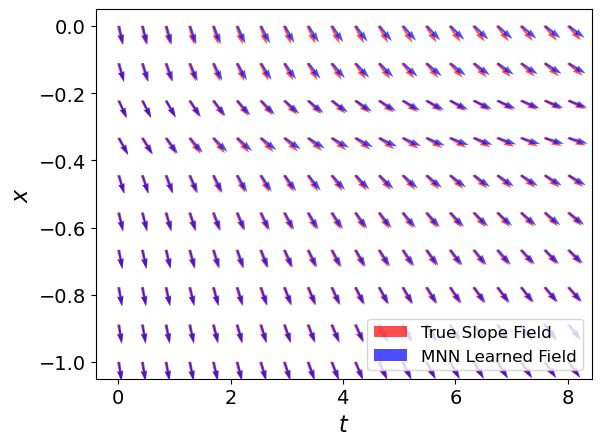

In [32]:
fig, ax = plt.subplots()
#N = np.sqrt(dx0**2 + dx1**2)
#color = np.sqrt(((dx0-n)/2)*2 + ((dx1-n)/2)*2)
#color = np.sqrt(((dx0*x+3)/2)*2 + ((dx1*y+3)/2)*2)
#ax.quiver(x, y, dx0/N, dx1/N, angles='xy', color='b')
#ax.quiver(x, y, dx0, dx1, angles='xy', color='r')
#ax.quiver(x, y, dx0, dx1, angles='xy', color='r', alpha=0.9, ls=':')
#ax.quiver(x, y, dx0, dx1, angles='xy', color='r', alpha=0.9, ls=':', label='Ground truth Field')
#ax.quiver(x, y, sdx0, sdx1, angles='xy', color='b', alpha=0.9, ls=':', label='Learned Field')

ax.quiver(tin, xin, x_true, y_true, angles='xy', color='r', alpha=0.7, label='True Slope Field')#, ls=':')
ax.quiver(tin+0.02, xin, x_sim, y_sim, angles='xy', color='b', alpha=0.7, label='MNN Learned Field')#, ls=':')

#ax.plot(x_train[:, 0], x_train[:, 1], label='True Sample')
#ax.plot(x_sim[:, 0], x_sim[:, 1], label='SINDy Sample')

#ax.plot(x_train2[:, 0], x_train2[:, 1], label='T Sample 2')
#ax.plot(x_sim2[:, 0], x_sim2[:, 1], label='Learned Sample 2')
#plt.legend(loc='upper right')
plt.legend(loc='lower right')
plt.xlabel('$t$')
plt.ylabel('$x$')
#ax.quiver(x, y, dx0, dx1)1

In [33]:
fig.savefig(os.path.join('..', 'img','euler_slope2_.pdf'), bbox_inches='tight')

In [ ]:
def f(state, t):
    x, y, z = state
    #return sigma * (y - x), x * (rho - z) - y, x * y - beta * z
    #return sigma * (y - x), x * (rho - z) - y, x * y - beta * z
    dx = -0.0879 + 1.6870*x
    dy = -0.8512 + 1.0273*x -0.5622*z -0.0339*x*y +0.1025*y*y
    dz = 0.9278 + 0.0479*x + 1.2808*z
    #return -0.0879, x * (rho - z) - y, x * y - beta * z
    dx = (dx - 1.6824*x)
    dy = (dy - 1.9404*y)
    dz = (dz - 1.3089*z)

    dx = dx/0.8365
    dy = dy/0.9703
    dz = dz/0.3601

    return dx,dy,dz

state0 = [1.0, 1.0, 1.0]
#time_steps = np.arange(0.0, 40.0, dt)
time_steps = np.linspace(0, 2000*0.01, 2000)
self.time_steps = time_steps

x_sim = odeint(f, state0, time_steps)
#return x_sim

In [6]:
x_list = L.run_once()

In [7]:
len(x_list)

4

In [9]:
x_list[0].shape

torch.Size([10, 50, 3])

In [11]:
import torch

In [12]:
X = torch.cat(x_list, dim=0)

In [13]:
X.shape

torch.Size([40, 50, 3])

In [14]:
Xp = X.reshape(40*50,3)

In [15]:
Xp.shape

torch.Size([2000, 3])

In [18]:
Xp = Xp.detach().cpu().numpy()

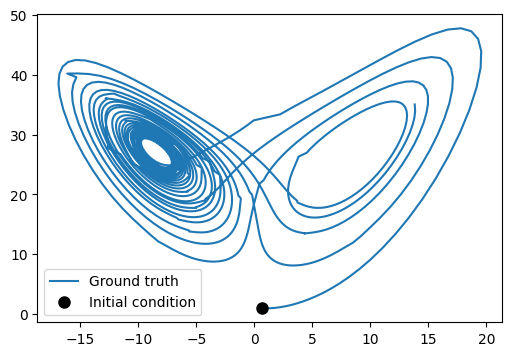

In [19]:
plt.figure(figsize=(6, 4))
plt.plot(Xp[:, 0], Xp[:, 2], label='Ground truth')
#plt.plot(x_sim[:, 0], x_sim[:, 2], '--', label='SINDy estimate')
plt.plot(Xp[0, 0], Xp[0, 2], "ko", label="Initial condition", markersize=8)
plt.legend()
plt.draw()
plt.show()